In [4]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import make_lupton_rgb

Let's make a picture.

We can use pictures like this to train a model to:
1. Determine whether a picture contains a seven or not
2. Find instances of seven in a picture

(32, 32, 3)


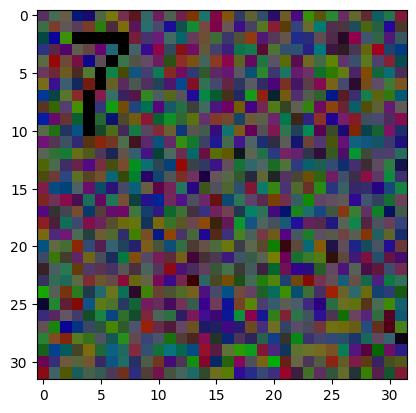

In [21]:
rng = np.random.default_rng()
image_r = rng.random((32,32))
image_g = rng.random((32,32))
image_b = rng.random((32,32))
image = make_lupton_rgb(image_r, image_g, image_b, stretch=1)
seven = [[0, 0], [0, 1], [0, 2], [0, 3], [0, 4], [1, 4], [2, 3], [3,2], [4, 2], [5, 1], [6, 1], [7, 1], [8, 1]]
randomx = np.random.randint(2, 20)
randomy = np.random.randint(3, 20)
for pixel in seven:
    image[randomx+pixel[0], randomy+pixel[1]] = (0, 0, 0)
plt.imshow(image)

Okay, so we have established that we need a model that is:
* translation invariant
* efficient 
* capable of capturing local context

We can do this by using **convolutional neural networks**. Today we are going to focus on the nature of *convolution*. 

*Convolutions* construct features over local regions in the input data using convolution *kernels*. Here's a sample kernel:

In [22]:
kernel = np.array([[-1,-1,-1], [-1,8,-1], [-1,-1,-1]])

Bad pipe message: %s [b'\x0b\x1e\xb6\x0bB\x00\xa7\x85\x19\x05X', b',\xd95:\xb1 C)/W\xfd\xb5\xa5\xb51\x86\x89\x1c\x1b\xd1\xee:Vw\xeeG\xb9R9\xb2\xab\x9d', b'\x02\xa2@\x9b\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00\x1c\x04\x03\x05\x03\x06\x03\x08\x07\x08']
Bad pipe message: %s [b'\t\x08\n\x08\x0b\x08\x04']
Bad pipe message: %s [b'\x08\x06\x04\x01\x05\x01\x06', b'']
Bad pipe message: %s [b'\xb2\xfcu\xccn\xa5X\xa3\x0c}#\xc9\xfeMy\xbe\xe79 \xf51\xa4\xc1\x1aS\xce\x0bW\xe1\xf2=\xceP\xc6\xc7k,\\(\x9e\xa1\x1bw\xdf\xfe\x12\xa3\x89\x84\xf77\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00\

Take a few minutes and define a function that will apply this kernel starting from the top left of the input image and working to the bottom right. At each stop, if the kernel is $Y$ and the subarray of the picture is $X$, calculate $\sum_{i,j} x_{i,j}*y_{i,j}$.
* What is the shape of the output of the convolution?
* Does it give information useful for finding sevens?
* How do you apply the kernel across R/G/B?
* What do you do at the edges?
* Does this kernel really need to be applied pixel by pixel, or could we skip some pixels?

Let's pause a minute and talk about:
* *padding*
* *channels*
* *stride*
* *cross-correlation*
* *feature map*
* *receptive field*

## Resources

* https://nicholasrui.com/2017/12/18/convolutions-and-the-game-of-life/
* https://towardsdatascience.com/simple-introduction-to-convolutional-neural-networks-cdf8d3077bac
* https://deeplizard.com/resource/pavq7noze2
* https://poloclub.github.io/cnn-explainer/